<a href="https://colab.research.google.com/github/YangTaeSung/CAU-MachineLearning/blob/master/assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100
18


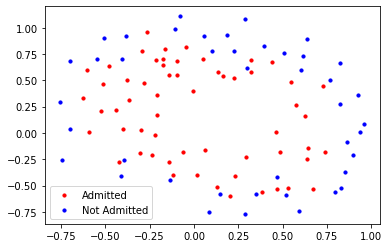

,feature1,feature2,faulty
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [657]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_tnc
import matplotlib.pyplot as pp
%matplotlib inline

def load_data(path, header):
    marks_df = pd.read_csv(path, header=header, names = ['feature1', 'feature2', 'faulty'])
    return marks_df

# load the data from the file
load_data = load_data("data-nonlinear.txt", None)
    
data = load_data[:100] # 100번 인덱스까지 training data
testing_data = load_data.iloc[100:118, 0:3] # 나머지 testing data

print(len(data))
print(len(testing_data))

# xy = feature values, all the columns except the last column
xy = data.iloc[:, :-1]

# label = target values, last column of the data frame
label = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = data.loc[label == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[label == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], c = 'red', s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],c = 'blue', s=10, label='Not Admitted')
plt.legend()
plt.show()
    
load_data.head()
    

In [658]:
# get the features
X = data.iloc[:, :2]
X.head()

,feature1,feature2
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


In [0]:
# define function to map higher order polynomial features
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res


In [0]:
degree = 6

In [0]:
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree)

In [0]:
y = data.iloc[:, 2] # label

In [0]:
def sigmoid(z):
    # 0과 1 사이의 모든 실제 값을 매핑하는 데 사용되는 활성화 함수 (sigmoid)
    return 1 / (1 + np.exp(-z))

def costFunc(theta, X, y):
    m = y.shape[0]
    z = X.dot(theta)
    h = sigmoid(z)
    term1 = y * np.log(h)
    term2 = (1- y) * np.log(1 - h)
    J = -np.sum(term1 + term2, axis = 0) / m
    return J 


In [0]:
# Set initial values for our parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

In [665]:
# call the optimization routine
from scipy.optimize import minimize
res = minimize(costFunc, initial_theta, args=(X_poly, y))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [0]:
# our optimizated coefficients
theta = res.x

In [0]:
def plotDecisionBoundary(theta,degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['good', 'faulty', 'Decision Boundary'])
    return cs

In [0]:
def plotDecisionBoundary1(theta,degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],colors = 'red')
    axes.legend(labels=['good', 'faulty', 'Decision Boundary'])
    return cs

In [0]:
def plotDecisionBoundary2(theta,degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],colors = "green")
    axes.legend(labels=['good', 'faulty', 'Decision Boundary'])
    return cs

In [0]:
def plotDecisionBoundary3(theta,degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],colors = 'blue')
    axes.legend(labels=['good', 'faulty', 'Decision Boundary'])
    return cs

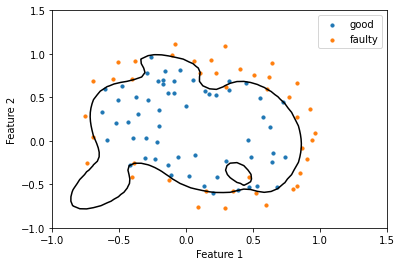

In [671]:
# Plot Decision boundary
fig, axes = pp.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
#axes.legend(title='Legend', loc = 'best' )

plotDecisionBoundary(theta, degree, axes)

In [0]:
# define the regularized cost function
jForPlot1 = []
jForPlot2 = []
jForPlot3 = []

iForPlot1 = []
iForPlot2 = []
iForPlot3 = []

def costFuncReg(theta, X, y, reg_factor):
    i = 1
    m = y.shape[0]
    z = X.dot(theta)
    h = sigmoid(z)
    term1 = y * np.log(h)
    term2 = (1- y) * np.log(1 - h)
    J = -np.sum(term1 + term2, axis = 0) / m
    
    # Regularization Term
    reg_term = (reg_factor * sum(theta[1:] ** 2)) / (2 * m)
    J = J + reg_term

    if reg_factor == 10:
      jForPlot1.append(J)
    elif reg_factor == 1:
      jForPlot2.append(J)
    elif reg_factor == 0:
      jForPlot3.append(J)

    return J  

In [0]:
# Set the lamda for overfitting
reg_factor = 10
under_lamda = reg_factor

In [0]:
degree3 = 6
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree3)

# Set initial values for our parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

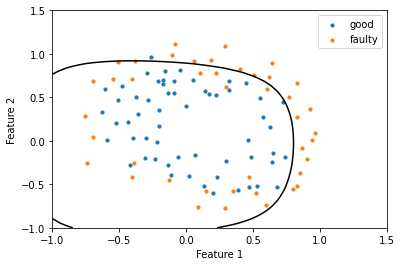

In [675]:
# Run the optimzation function with regularization factor passed to the cost function
res = minimize(costFuncReg, initial_theta, args=(X_poly, y, reg_factor))
theta3 = res.x.reshape(res.x.shape[0], 1)

for i in range(len(jForPlot1)):
  iForPlot1.append(i+1)

# Plot Decision boundary
fig, axes = pp.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
#axes.legend(title='Legend', loc = 'best' )

plotDecisionBoundary(theta3, degree3, axes)

In [0]:
# Set the lamda for overfitting
reg_factor = 1
right_lamda = reg_factor

In [0]:
degree2 = 6
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree2)

# Set initial values for our parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

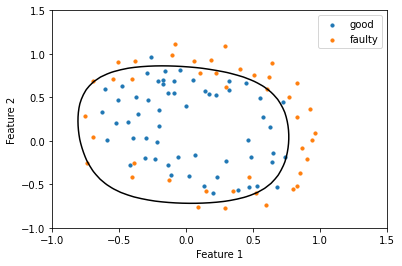

In [678]:
# Run the optimzation function with regularization factor passed to the cost function
res = minimize(costFuncReg, initial_theta, args=(X_poly, y, reg_factor))
theta2 = res.x.reshape(res.x.shape[0], 1)

for i in range(len(jForPlot2)):
  iForPlot2.append(i+1)

# Plot Decision boundary
fig, axes = pp.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
#axes.legend(title='Legend', loc = 'best' )

plotDecisionBoundary(theta2, degree2, axes)

In [0]:
# Set the lamda for underfitting
reg_factor = 0
over_lamda = reg_factor

In [0]:
degree1 = 6
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree1)

# Set initial values for our parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


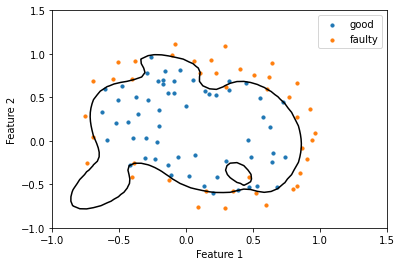

In [681]:
# Run the optimzation function with regularization factor passed to the cost function
res = minimize(costFuncReg, initial_theta, args=(X_poly, y, reg_factor))
theta1 = res.x.reshape(res.x.shape[0], 1)

for i in range(len(jForPlot3)):
  iForPlot3.append(i+1)

# Plot Decision boundary
fig, axes = pp.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
#axes.legend(title='Legend', loc = 'best' )

plotDecisionBoundary(theta1, degree1, axes)

***
***
# **RESULT**
***
***

# 1. Plot the training data

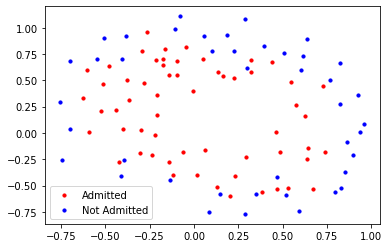

In [682]:
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], c = 'red', s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],c = 'blue', s=10, label='Not Admitted')
plt.legend()
plt.show()

# 2.Plot the training error with varying regularization parameters

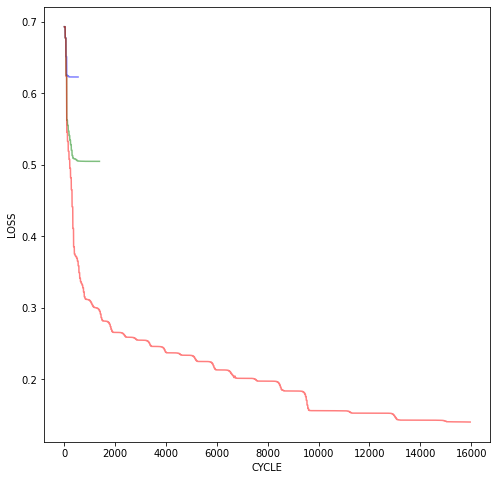

In [683]:
plt.figure(figsize=(8, 8)) # 그래프 사이즈 조절
plt.xlabel('CYCLE')
plt.ylabel('LOSS')
plt.plot(iForPlot1, jForPlot1, c = 'blue', alpha = 0.5)
plt.plot(iForPlot2, jForPlot2, c = 'green', alpha = 0.5)
plt.plot(iForPlot3, jForPlot3, c = 'red', alpha = 0.5)
plt.show()

# 3. Display the values of the chosen regularization parameters

In [684]:
print('\033[31m' + 'Overfitting lamda ')
print(over_lamda )
print('\033[92m' + 'Just-right lamda ')
print(right_lamda )
print('\033[34m' + 'Underfitting lamda ')
print(under_lamda )

Overfitting lamda 
0
Just-right lamda 
1
Underfitting lamda 
10


# 4. Plot the training accuracy with varying regularization parameters

# 5. Display the final training accuracy with varying regularization parameters

# 6. Plot the optimal classifier with varying regularization parameters superimposed on the training data

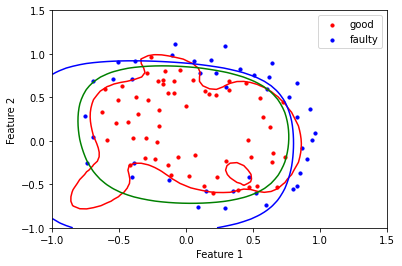

In [685]:
# Plot Decision boundary
fig, axes = pp.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],c = 'red', s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], c = 'blue', s=10, label='Not Admitted')
#axes.legend(title='Legend', loc = 'best' )

plotDecisionBoundary1(theta1, degree1, axes)
plotDecisionBoundary2(theta2, degree2, axes)
plotDecisionBoundary3(theta3, degree3, axes)

  
    
      
        
          
            
            -  
              
                
                  
                    
                      
                        
                        짤림방지  
                          
                           
                             
                               
